In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torchmetrics
import seaborn as sns
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
train_data = pd.read_csv("../datasets/titanic/train.csv")
test_data = pd.read_csv("../datasets/titanic/test.csv")
train_data.head()
# test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Checking for missing values
null_data = train_data.isnull().sum()
null_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

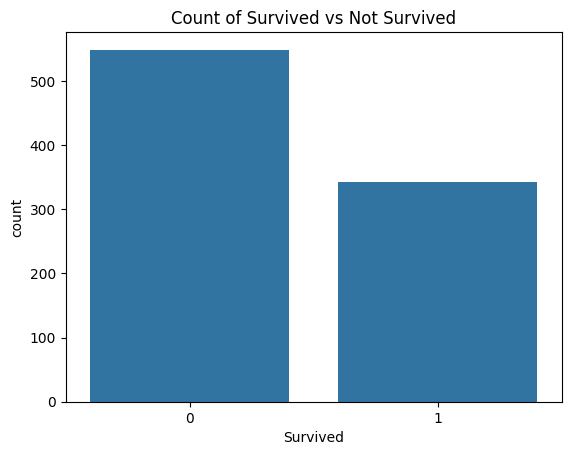

In [7]:
sns.countplot(x='Survived', data=train_data)
plt.title('Count of Survived vs Not Survived')
plt.show()


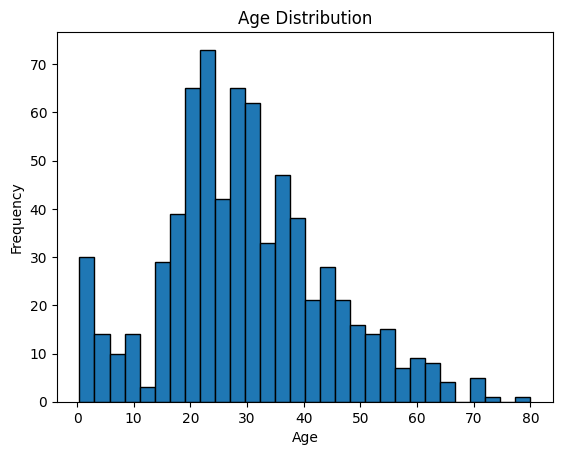

In [8]:
plt.hist(train_data['Age'].dropna(), bins=30, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

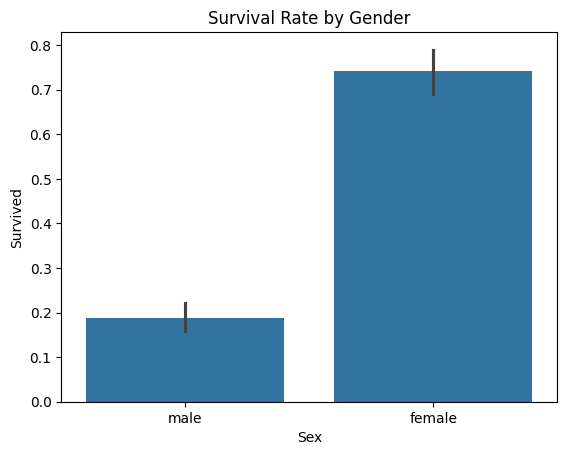

In [9]:
sns.barplot(x='Sex',y='Survived',data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

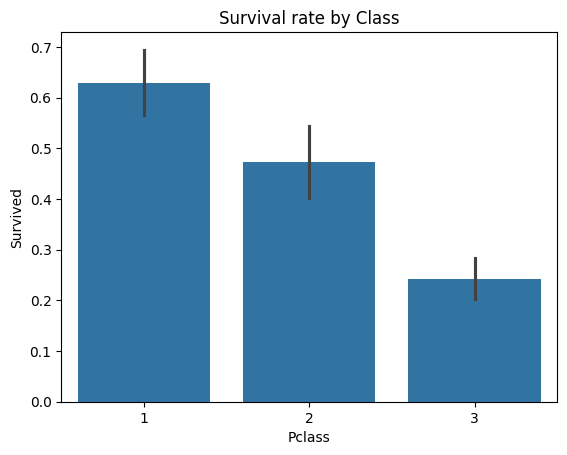

In [10]:
# Survival rate by Class
sns.barplot(data=train_data,x='Pclass',y='Survived')
plt.title('Survival rate by Class')
plt.show()

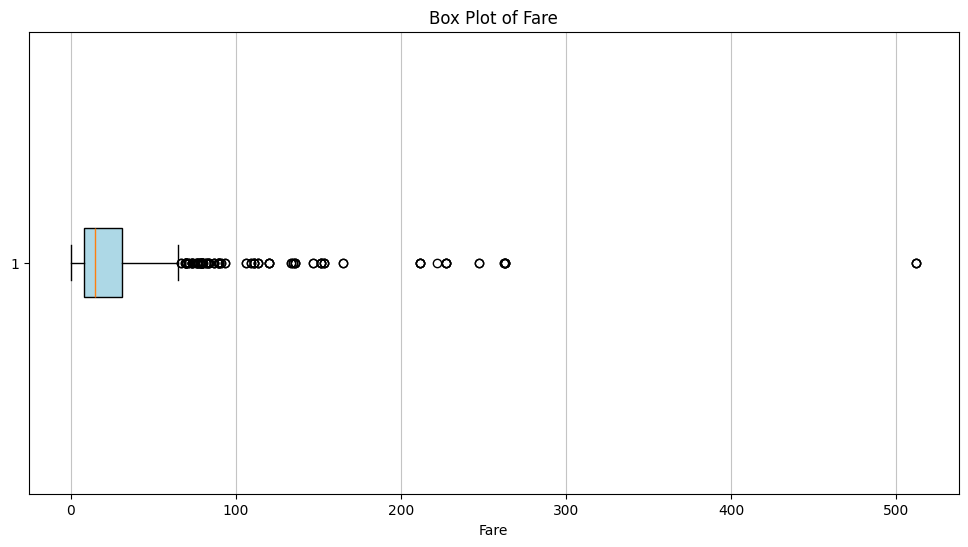

In [11]:
# Create a figure for the box plot
plt.figure(figsize=(12, 6))

# Plot the box plot
plt.boxplot(train_data['Fare'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Set title and labels
plt.title('Box Plot of Fare')
plt.xlabel('Fare')

# Show the plot
plt.grid(axis='x', alpha=0.75)
plt.show()

In [12]:
# Handling Missing values
train_data['Age'].fillna(train_data['Age'].mean()) # here we are replacing the missing values with mean()
train_data['Embarked'].fillna('S') # here we are missing the missing values with S

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [13]:
# Handling Missing values
train_data['Age'].fillna(train_data['Age'].mean()) # here we are replacing the missing values with mean()
train_data['Embarked'].fillna('S') # here we are missing the missing values with S

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [14]:
null_data = train_data.isnull().sum()
null_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# putting male as 0 and female as 1
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# putting the 
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q':0})

In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [17]:
# Dropping unnecessary columns
train_data = train_data.drop(columns=['Name','Ticket','Cabin','PassengerId'])

In [18]:
X = train_data.drop('Survived', axis=1).values  # Features
y = train_data['Survived'].values  # Target variable

In [19]:
X_train,X_label,y_train,y_label = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
len(X_train),len(X_label),len(y_train),len(y_label)

(712, 179, 712, 179)

In [21]:
# Standarizing the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_label = scaler.transform(X_label)

In [22]:
# Now converting the value to tensor
X_train = torch.tensor(X_train,dtype=torch.float32)
X_label = torch.tensor(X_label,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32).view(-1,1)
y_label = torch.tensor(y_label,dtype=torch.float32).view(-1,1)

In [23]:
# Creating a model
class TitanicModel(nn.Module):
    def __init__(self,input_size):
        super(TitanicModel,self).__init__()
        self.fc1 = nn.Linear(in_features=input_size,out_features=30)
        self.fc2 = nn.Linear(in_features=30,out_features=10)
        self.fc3 = nn.Linear(in_features=10,out_features=1)

    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [24]:
input_size = X_train.shape[1]
model_0 = TitanicModel(input_size)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.001)

In [26]:
torch.manual_seed(42)


train_loss_list = []
validation_loss_list = []
train_accuracy_list = []
validation_accuracy_list = []

epochs = 1000
accuracy_metric = torchmetrics.Accuracy(task="binary") 

for epoch in range(epochs):
    model_0.train()
    
    y_pred = model_0(X_train)
    
    y_pred = torch.where(torch.isnan(y_pred), torch.tensor(0.5), y_pred)
    
    loss = loss_fn(y_pred, y_train.view(-1, 1))
    
    train_loss_list.append(loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

    train_accuracy = accuracy_metric(y_pred, y_train.view(-1, 1).int())
    train_accuracy_list.append(train_accuracy.item())
    model_0.eval()
    with torch.inference_mode():
        test_pred = torch.sigmoid(model_0(X_label))
        test_pred = torch.where(torch.isnan(test_pred), torch.tensor(0.5), test_pred)
        test_loss = loss_fn(test_pred, y_label.view(-1, 1))
        validation_loss_list.append(test_loss.item())
        # Calculate validation accuracy
        validation_accuracy = accuracy_metric(test_pred, y_label.view(-1, 1).int())
        validation_accuracy_list.append(validation_accuracy.item())
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch} - Training Loss: {loss.item():.4f}, Validation Loss: {test_loss.item():.4f}')
            print(f'Epoch {epoch} - Training Accuracy: {train_accuracy * 100:.2f}%, Validation Accuracy: {validation_accuracy * 100:.2f}%')

Epoch 0 - Training Loss: 0.7859, Validation Loss: 0.7674
Epoch 0 - Training Accuracy: 62.36%, Validation Accuracy: 58.66%
Epoch 100 - Training Loss: 0.7859, Validation Loss: 0.7674
Epoch 100 - Training Accuracy: 62.36%, Validation Accuracy: 58.66%
Epoch 200 - Training Loss: 0.7859, Validation Loss: 0.7674
Epoch 200 - Training Accuracy: 62.36%, Validation Accuracy: 58.66%
Epoch 300 - Training Loss: 0.7859, Validation Loss: 0.7674
Epoch 300 - Training Accuracy: 62.36%, Validation Accuracy: 58.66%
Epoch 400 - Training Loss: 0.7859, Validation Loss: 0.7674
Epoch 400 - Training Accuracy: 62.36%, Validation Accuracy: 58.66%
Epoch 500 - Training Loss: 0.7859, Validation Loss: 0.7674
Epoch 500 - Training Accuracy: 62.36%, Validation Accuracy: 58.66%
Epoch 600 - Training Loss: 0.7859, Validation Loss: 0.7674
Epoch 600 - Training Accuracy: 62.36%, Validation Accuracy: 58.66%
Epoch 700 - Training Loss: 0.7859, Validation Loss: 0.7674
Epoch 700 - Training Accuracy: 62.36%, Validation Accuracy: 58.

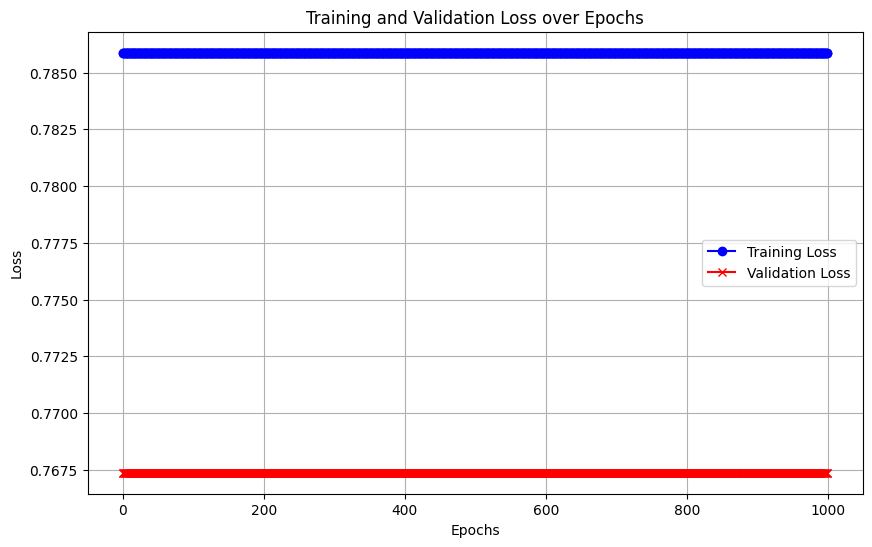

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(train_loss_list, label='Training Loss', color='blue', marker='o')
plt.plot(validation_loss_list, label='Validation Loss', color='red', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming actual_values and predicted_values are already available
conf_matrix = confusion_matrix(actual_values, predicted_values)

# print(conf_matrix)
# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


NameError: name 'actual_values' is not defined